In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = '/content/drive/MyDrive/Kvasir'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
from keras.models import Model
import tensorflow
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LSTM,Dropout,TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import normalize

In [ ]:
BATCH_SIZE = 64

train_datagen = image.ImageDataGenerator(rescale=1./255, rotation_range=40, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, horizontal_flip=True, fill_mode="nearest", validation_split=0.1)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
#Defining paths
TRAIN_PATH = "/content/drive/MyDrive/Kvasir/Train"
TEST_PATH = "/content/drive/MyDrive/Kvasir/Test"

In [ ]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

validation_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 6480 images belonging to 8 classes.
Found 720 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
from keras.metrics import top_k_categorical_accuracy
def top_5_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

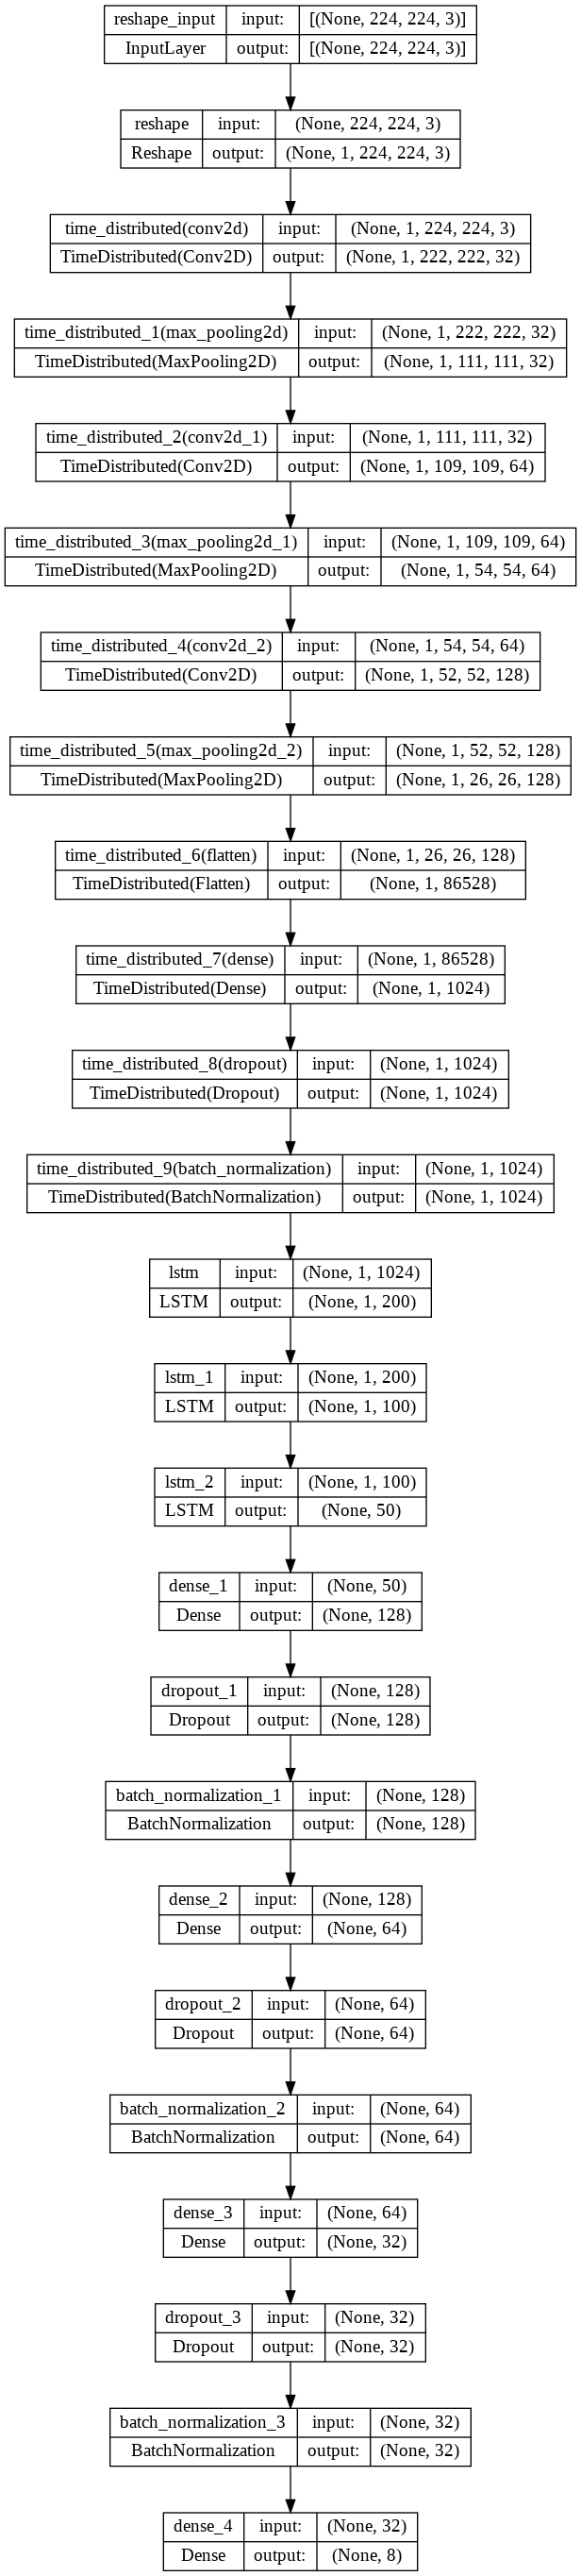

In [ ]:
model = tf.keras.models.Sequential()

#CNN
model.add(keras.layers.Reshape(target_shape = (-1 ,224 , 224, 3), input_shape=(224,224,3)))

model.add(TimeDistributed(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu')))
model.add(TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))))

model.add(TimeDistributed(tf.keras.layers.Conv2D(64,(3,3),activation='relu')))
model.add(TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))))


model.add(TimeDistributed(tf.keras.layers.Conv2D(128,(3,3),activation='relu')))
model.add(TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))))

model.add(TimeDistributed(tf.keras.layers.Flatten()))
model.add(TimeDistributed(tf.keras.layers.Dense(1024,activation='relu')))
model.add(TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(TimeDistributed(keras.layers.BatchNormalization()))

#LSTM
model.add(LSTM(200, activation='tanh', dropout=0.2, return_sequences=True))
model.add(LSTM(100, activation='tanh', dropout=0.2, return_sequences=True))
model.add(LSTM(50, activation='tanh', dropout=0.2, return_sequences=False))

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(8,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate = 1e-4),metrics=['accuracy', top_5_categorical_accuracy])
display(keras.utils.plot_model(model, show_shapes=True, show_layer_names=True))

In [ ]:
#summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 224, 224, 3)    0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 222, 222, 32)  896       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 111, 111, 32)  0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 109, 109, 64)  18496     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 54, 54, 64)    0         
 tributed)                                              

In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
model_history = model.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=30,
                            validation_data=validation_generator,
                            callbacks=[tl_checkpoint_1, early_stop],
                            verbose=1)

Epoch 1/30
102/102 [==============================] - ETA: 0s - loss: 2.1508 - accuracy: 0.2261 - top_5_categorical_accuracy: 0.7907 
Epoch 1: val_loss improved from inf to 2.08913, saving model to tl_model_v1.weights.best.hdf5
102/102 [==============================] - 2173s 21s/step - loss: 2.1508 - accuracy: 0.2261 - top_5_categorical_accuracy: 0.7907 - val_loss: 2.0891 - val_accuracy: 0.1250 - val_top_5_categorical_accuracy: 0.6250
Epoch 2/30
102/102 [==============================] - ETA: 0s - loss: 1.5716 - accuracy: 0.3773 - top_5_categorical_accuracy: 0.9386
Epoch 2: val_loss improved from 2.08913 to 2.07629, saving model to tl_model_v1.weights.best.hdf5
102/102 [==============================] - 186s 2s/step - loss: 1.5716 - accuracy: 0.3773 - top_5_categorical_accuracy: 0.9386 - val_loss: 2.0763 - val_accuracy: 0.1250 - val_top_5_categorical_accuracy: 0.6250
Epoch 3/30
102/102 [==============================] - ETA: 0s - loss: 1.3493 - accuracy: 0.4656 - top_5_categorical_acc

In [ ]:
# Generate predictions
model.load_weights('tl_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

800/800 [==============================] - 279s 348ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes, model_pred_classes)
print("CNN Model's Top 1% Accuracy: {:.2f}%".format(model_acc * 100))

CNN Model's Top 1% Accuracy: 76.75%


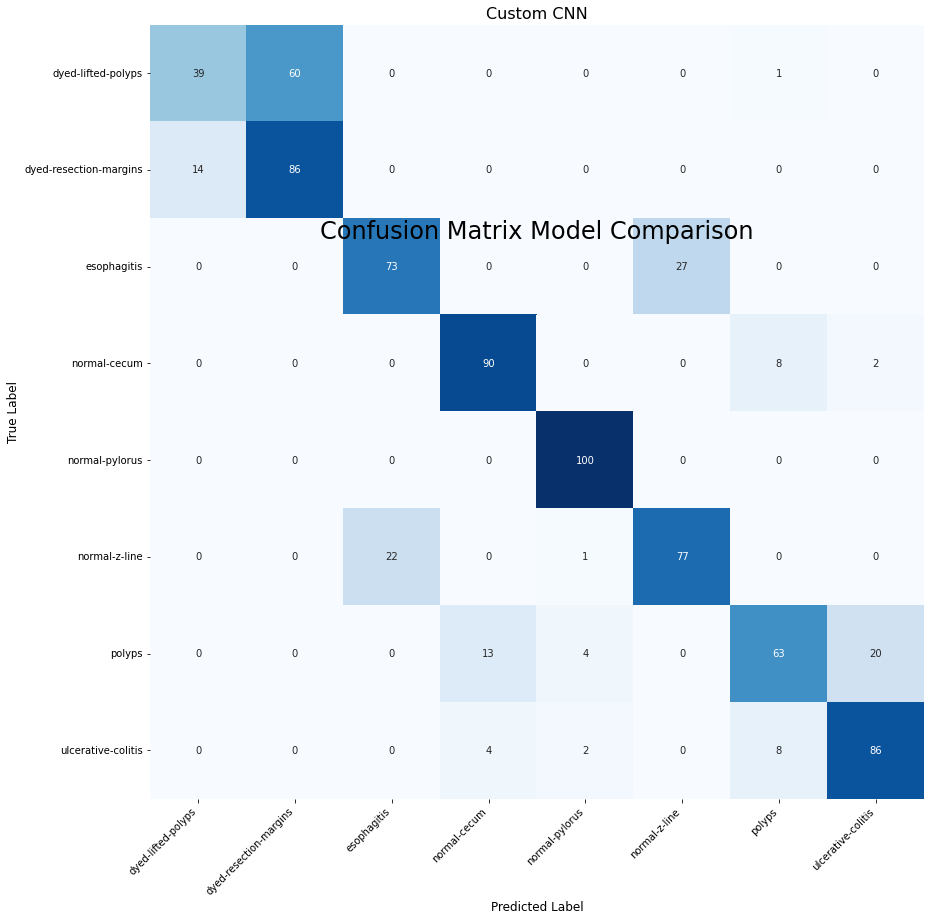

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the names of the ten classes
class_names = test_generator.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1) = plt.subplots(figsize=(20, 10))

plot_heatmap(true_classes, model_pred_classes, class_names, ax1, title="Custom CNN")
fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()

In [ ]:
labels = os.listdir(TRAIN_PATH)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_classes,model_pred_classes,target_names = labels))

                        precision    recall  f1-score   support

         normal-z-line       0.74      0.39      0.51       100
        normal-pylorus       0.59      0.86      0.70       100
dyed-resection-margins       0.77      0.73      0.75       100
          normal-cecum       0.84      0.90      0.87       100
    ulcerative-colitis       0.93      1.00      0.97       100
                polyps       0.74      0.77      0.75       100
           esophagitis       0.79      0.63      0.70       100
    dyed-lifted-polyps       0.80      0.86      0.83       100

              accuracy                           0.77       800
             macro avg       0.77      0.77      0.76       800
          weighted avg       0.77      0.77      0.76       800

